<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Reach-and-Sample-Sizes" data-toc-modified-id="Reach-and-Sample-Sizes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reach and Sample Sizes</a></span><ul class="toc-item"><li><span><a href="#Seasonal-Trends" data-toc-modified-id="Seasonal-Trends-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Seasonal Trends</a></span></li></ul></li></ul></div>

In [43]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
%run "../../zUtilz/LG_load_envz.ipynb"

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [44]:
## Load dataset 
dts = pd.read_csv( "%s/LG/1803_KE_CHV Data 2015-March 2018.csv" % DATA_DIR)


In [46]:
#dts[:2].T.head(100)
pd.Series(dts.columns).head(40)
pd.Series(dts.columns).tail(40)

0                            branch_uuid
1                            branch_name
2                        supervisor_uuid
3                        supervisor_name
4                               chw_uuid
5                               chw_name
6                              chw_phone
7                         interval_start
8                        interval_number
9                  active_chws_in_period
10                   families_registered
11                pregnancies_registered
12                    on_time_pnc_visits
13              total_healthy_pnc_visits
14               all_first_fu_pnc_visits
15                            edd_no_pnc
16                            assess_any
17                             assess_u1
18                             assess_u5
19                         treatments_u1
20                            malaria_u1
21                           diarrhea_u1
22                          pneumonia_u1
23                         treatments_u5
24              

50                                     gave_amox_u5
51                          baby_danger_signs_refer
52                          cough_two_weeks_treated
53                                    malaria_4m_3y
54                                    malaria_3y_7y
55                                   malaria_7y_12y
56                                malaria_12y_above
57                         act_6packs_issued_4m_3yr
58                        act_6packs_issued_3yr_7yr
59                       act_6packs_issued_7yr_12yr
60                     act_6packs_issued_12yr_above
61                            chps_treating_malaria
62                                 families_visited
63                   households_using_treated_water
64          households_with_hand_washing_facilities
65              households_with_functional_latrines
66                                population_served
67                 female_population_served_15_19yr
68                children_population_served_0_28dy
69          

In [47]:
## 1. set identities and mask  
dnul = zSetRegion( dts)
dts["year"] = pd.to_datetime(dts["interval_start"], dayfirst=True, errors='coerce').dt.year
dts["month"] = pd.to_datetime(dts["interval_start"], dayfirst=False, errors='coerce') .dt.month 

dts["id_chw"] = zCodifyID(dts, "chw_name", "supervisor_name")
dts["id_supervisor"] = zCodifyID(dts, "supervisor_name", "branch_name") 


In [7]:
## additional computed fields 

dts["assess_child"] = dts["assess_u1"]+dts["assess_u5"]
dts["total_assessments"]= dts["assess_any"]+dts["assess_child"]

dts["malaria_child"] = dts["malaria_u1"]+dts["malaria_u5"]
dts["malaria_other"] = dts["malaria_all_ages"] - dts["malaria_child"]

dts["malaria_mrdt_treated_all"] = dts["malaria_u5_mrtd_pos_treated"]+dts["malaria_o5_mrtd_pos_treated"]

dts["total_pneumonia"] = dts["pneumonia_u1"]+dts["pneumonia_u5"]
dts["total_treat_child"] = dts["treatments_u1"]+dts["treatments_u5"]

dts["total_diarrhea"] = dts["diarrhea_u1"]+dts["diarrhea_u5"] 
dts["diarrhea_other"] = dts["diarrhoea_u6"] - dts["diarrhea_u5"] 


In [23]:
dcolz = ["id_chw", "branch_name", "id_supervisor", "year", "month", 
         "active_chws_in_period", "community_events", 
        "families_registered", "population_served",
         
         "pregnancies_registered", "underage_pregnancies", 
         "edd_no_pnc", 
         "anc_visits",          
         "total_deliveries", "total_deliveries_at_hf", 
         "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "on_time_pnc_visits", "on_time_pnc_visits_48h", 
         
         
         "assess_u1", "assess_u5", "assess_child", "assess_any", "total_assessments",
         "treatments_u1", "treatments_u5", "total_treat_child", 
         
         "malaria_u1", "malaria_u5", "malaria_child", "malaria_other", "malaria_all_ages", 
         "diarrhea_u1", "diarrhea_u5", "diarrhea_other", "total_diarrhea",
         "pneumonia_u1", "pneumonia_u5", "total_pneumonia", 
         
         "cough_two_weeks", "fast_breathing_u5", "fever_cases", 
         
         "mrdt_positive", "mrdt_negative", "mrdt_none",
         
         "gave_amox_u5", "malaria_all_ages_gave_al", "act_6packs_issued",        
         "malaria_u5_mrtd_pos_treated", "malaria_o5_mrtd_pos_treated", "malaria_mrdt_treated_all", 
         
         "required_follow_ups", "on_time_follow_ups", "missed_visits", 
         
         "households_using_treated_water", "households_with_functional_latrines", "households_with_hand_washing_facilities",
         
        ]

dcol_namez = ["id_chw", "branch_name", "id_supervisor", "year", "month", 
         "active_chws_in_period", "community_events", 
        "families_registered", "population_served",
         
         "pregnancies_registered", "underage_pregnancies", 
         "edd_no_pnc", 
         "anc_visits",          
         "total_deliveries", "total_deliveries_at_hf", 
         "total_healthy_pnc_visits", "all_first_fu_pnc_visits", "on_time_pnc_visits", "on_time_pnc_visits_48h", 
         
         
         "assess_u1", "assess_u5", "assess_child", "assess_any", "total_assessments",
         "treatments_u1", "treatments_u5", "total_treat_child", 
         
         "malaria_u1", "malaria_u5", "malaria_child", "malaria_other", "total_malaria", 
         "diarrhea_u1", "diarrhea_u5", "diarrhea_other", "total_diarrhea",
         "pneumonia_u1", "pneumonia_u5", "total_pneumonia", 
         
         "has_cough_two_weeks", "has_fast_breathing_u5", "has_fever_cases", 
         
         "has_mrdt_positive", "has_mrdt_negative", "has_mrdt_none",
         
         "gave_amox_u5", "gave_al_all", "gave_act_6packs_all", ""        
         "gave_mrtd_pos_u5", "gave_mrtd_pos_o5", "gave_mrdt_all", 
         
         "required_follow_ups", "on_time_follow_ups", "missed_visits",
         
         "households_using_treated_water", "households_with_functional_latrines", "households_with_hand_washing_facilities",
         
        ]

## 3. filter to the variables we want only + rename columns 
db = pd.DataFrame( dts[ dcolz], columns=dcol_namez)

## 4. remove Rollout/Learning Data based on branch_name and HH per CHW
## drop test/pre-graduate records/chvs - outliers - 20 < x < 250
#dts.drop( dts[ (dts["families_registered"] < 20) | (dts["families_registered"] >350) ].index, inplace=True)

print( "\n\n1. HQ Test Data")
pd.pivot_table( db[ db["branch_name"]=="HQ"], index=["branch_name"], values=[ "id_supervisor", "id_chw"], aggfunc=zCountUnique, margins=True)
#db.drop( db[ (db["families_registered"] < 20) | (dts["families_registered"] >350) ].index, inplace=True)


db[:2].T.head(100)



 HQ Test Data


,id_chw,id_supervisor
branch_name,,
HQ,95.0,1.0
All,95.0,1.0


,0,1
id_chw,0_8b98a37a4f986b9d7c7fbdb169de5a28,0_8b98a37a4f986b9d7c7fbdb169de5a28
branch_name,Malava,Malava
id_supervisor,0_5fe9c3703ed9ed1f79e88642a45fb00a,0_5fe9c3703ed9ed1f79e88642a45fb00a
year,2015,2015
month,1,2
active_chws_in_period,0,0
community_events,0,0
families_registered,0,0
population_served,0,0
pregnancies_registered,0,0


In [20]:
db.sample( 7 )[["branch_name", "id_supervisor", "id_chw"]]
pd.pivot_table( db, index=["branch_name"], values=[ "id_supervisor", "id_chw"], aggfunc=zCountUnique, margins=True)

,branch_name,id_supervisor,id_chw
52067,Malaba,9_fcc45a0ba8f45ebe8fb470544732c7d3,5_191c5ab58c560c918b6ba8800b26329d
63787,Suneka,11_fcc45a0ba8f45ebe8fb470544732c7d3,5_f6dad7e50640e9aec30632642600c342
55715,Port Victoria,10_bbb95ea616580f9055db98d3ac8949f8,48_7f3685af9c2de6e62f4d30ce668a93f1
49810,Malaba,9_fcc45a0ba8f45ebe8fb470544732c7d3,5_cabbfd46ef87b2b7fc4b7c0edb4ae2ff
1034,Malava,0_874c81084a4ea15caf2daa0447839b05,1_576264904d03e4ddff10257de303318f
9338,Funyula,2_8b4b1d120f32c8460b5c913d9eea29b4,10_fe6eeda3a17a0a7e9f681c490a89e6e1
2577,Malava,0_e0ed9163780fd7ffab24b24005d9e767,2_0887eadc99d4e4f748f5f6459f88887b


,id_chw,id_supervisor
branch_name,,
Busia,190.0,7.0
Butula,211.0,10.0
Funyula,70.0,4.0
HQ,95.0,1.0
Kenyenya,129.0,7.0
Kuresoi,143.0,5.0
Malaba,186.0,7.0
Malava,141.0,6.0
Nambale,97.0,6.0


# Introduction

In [103]:
print("\n\n Reach for each year")
pd.pivot_table( dts[ (( (dts["Month"]==12) & (dts["Year"]!=2018) ) | ( (dts["Month"]==3) & (dts["Year"]==2018) ) ) ], index=["branch_name"], columns=["Year"], 
               values=["supervisor_uuid", "active_chws_in_period", "families_registered", ], 
              aggfunc={ "supervisor_uuid":zCountUnique, "active_chws_in_period":np.sum, "families_registered": np.sum, })




 Reach for each year


active_chws_in_period                families_registered        \
Year                           2015 2016 2017 2018                2015  2016   
branch_name                                                                    
Busia                             2  150  126  152                   2  2072   
Butula                            0   70  120  167                   0   479   
Funyula                           0    0   54   53                   0     0   
HQ                                0    2    4    5                   0     2   
Kenyenya                          0   21  103   99                   0    36   
Kuresoi                           0    0   59   58                   0     0   
Malaba                            0  108  101  166                   0   741   
Malava                            0   71  125  125                   0  4080   
Nambale                           0    0   94   92                   0     0   
Ogembo                            0    0   68   65                   0     0   
Port Victoria                     0   99  128  129                   0  2742   
Shinyalu                          0    0   68   66                   0     0   
Suneka                            0  114  101  113                   0  2618   
Thika                             0   16   53   56                   0    57   

                        supervisor_uuid                 
Year          2017 2018            2015 2016 2017 2018  
branch_name                                             
Busia          139  142               7    7    7    7  
Butula         107  646              10   10   10    8  
Funyula        246   46               4    4    4    3  
HQ              18    5               1    1    1    1  
Kenyenya        40   39               7    7    6    6  
Kuresoi        256   50               5    5    5    5  
Malaba         140  309               7    7    7    7  
Malava         116   41               6    6    6    5  
Nambale        141   41               6    6    6    6  
Ogembo          48   28               6    6    6    6  
Port Victoria  122   80               6    6    6    6  
Shinyalu        61   22               4    4    4    3  
Suneka         105  101               6    6    6    6  
Thika          468   95               5    5    5    5

# Reach and Sample Sizes

In [84]:
#dts.filter( )

## Seasonal Trends 

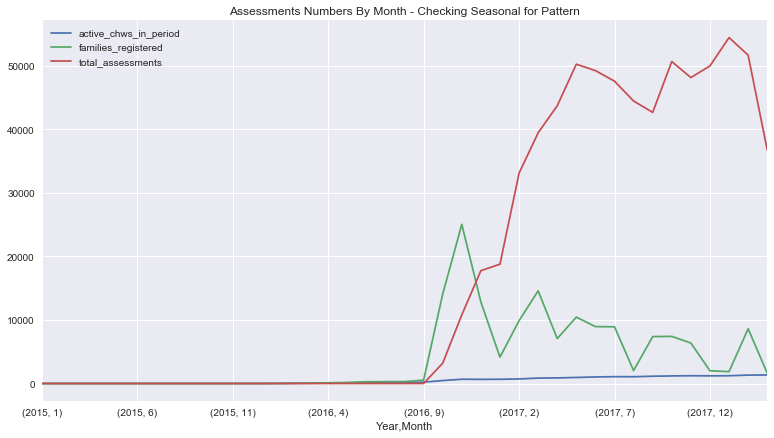

In [79]:
pd.pivot_table( dts, #[ dts["branch_name"]=="Butula"],
               index=["Year", "Month"], 
               values=["total_assessments", "families_registered", "active_chws_in_period"], 
               aggfunc=np.sum
              ).round( 0 ).plot( kind="line", figsize=(13,7), title="Assessments Numbers By Month - Checking Seasonal for Pattern")